In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Overview

Principal component analysis (PCA) is an unsupervised method used for:

* dimensionality reduction
* visualisation
* noise reduction
* feature extraction
* feature engineering

In [42]:
# random generator
RAND_SEED = 1
rng = np.random.RandomState(RAND_SEED)

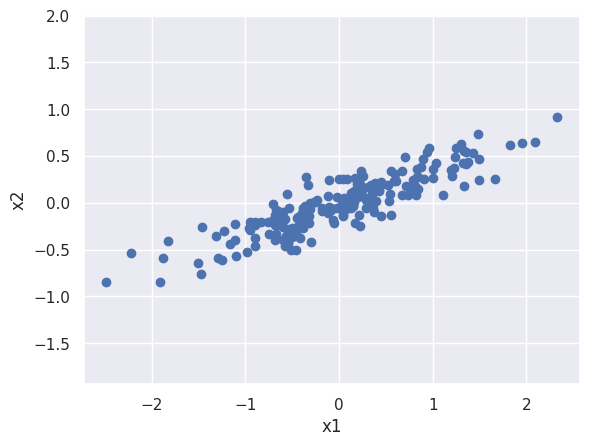

In [43]:
# create dataset
N_SAMPLES = 200
N_FEATURES = 2
# (200, 2)
X = np.dot(rng.rand(N_FEATURES, N_FEATURES), rng.randn(N_FEATURES, N_SAMPLES)).T

# plot data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.xlabel("x1");
plt.ylabel("x2");

Unsupervised learning attempts to learn the statistical relationship between variables ${x}_{1}$ and ${x}_{2}$.

PCA finds principal components (axes) of the dataset as a way to quantise this relationship.

In [44]:
from sklearn.decomposition import PCA

N_COMPONENTS = 2
# find the first N components of the dataset using PCA
pca = PCA(n_components=1, whiten=True)
pca.fit(X);

In [45]:
# print the values of the components
print(f"Component values:\n{pca.components_}")

Component values:
[[-0.94446029 -0.32862557]]


In [46]:
# print the variance along each component
print(f"Component variance:\n{pca.explained_variance_}")

Component variance:
[0.7625315]


In [47]:
# print the mean of the dataset along each component
print(f"PCA mean:\n{pca.mean_}")

PCA mean:
[ 0.03351168 -0.00408072]


In [48]:
# function to draw indiviudal arrow vectors
def draw_vector(start, end, ax=None):
  # return current axes instance or create a new one
  ax = ax or plt.gca()
  # set properties of the vector to draw
  arrowprops = dict(arrowstyle='->', linewidth=2, color='black',
               shrinkA=0, shrinkB=0 # prevent shrinking length of vector
               )
  # draw vector arrow on figure
  ax.annotate('', end, start, arrowprops=arrowprops)

0.7625315008826115 [-0.94446029 -0.32862557]


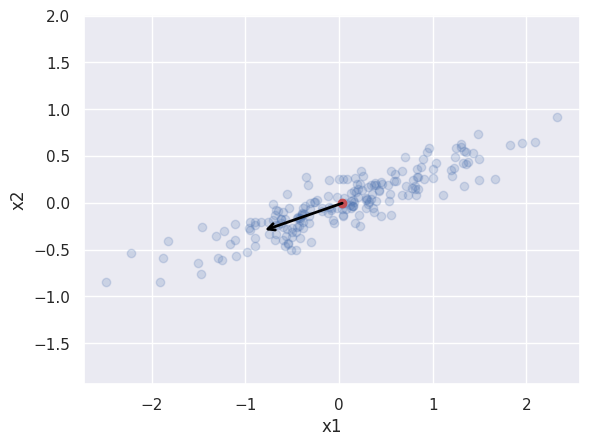

In [52]:
# mean value along each principal component
x1_mean = pca.mean_[0]
x2_mean = pca.mean_[1]

VEC_SCALE = 1

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# plot the mean of each principal component in red
plt.scatter(x1_mean, x2_mean, c='r')

# draw each principal component as vector
for length, vector in zip(pca.explained_variance_, pca.components_):
  print(length, vector)
  # scale each vector by the standard deviation of the data along the specific component direction
  v = vector * (VEC_SCALE * np.sqrt(length))
  # draw vector starting from the mean of the dataset
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');
plt.xlabel("x1");
plt.ylabel("x2");

Each principal components shows the magnitude and direction of the variances for each feature in the data. The largest principal components are associated with the largest variances when the data is projected in that direction.

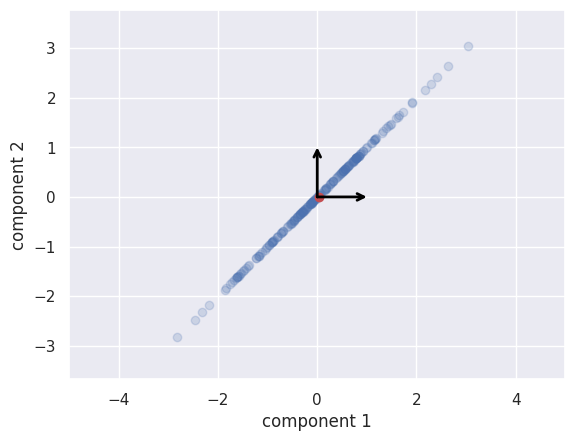

In [51]:
# project data along each of the principal component axes
X_pca = pca.transform(X)
# plot projected data
plt.scatter(X_pca[:, 0], X_pca[:, 0], alpha=0.2)
# plot mean of datatset
plt.scatter(x1_mean, x2_mean, c='r')

# draw scaled orthogonal basis principal components
draw_vector([0, 0], [0, VEC_SCALE])
draw_vector([0, 0], [VEC_SCALE, 0])

# adjust plot
plt.axis('equal');
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.xlim(-5, 5)
plt.ylim(-3, 3.1);